# Market Data

In [2]:
# Import packages

# Data Frames
import pandas as pd

# Vector operations
import numpy as np

# Financial Data 
import yfinance as yf # pip install yfinance

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import mplfinance as mpf # pip install mplfinance
import matplotlib.dates as mdates

In [3]:
# Set ticker and get historical data for past time period.

ticker = 'AAPL'
period = '6mo'
market_data = yf.download(ticker, period=period, multi_level_index=False)
market_data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-06-28,210.145279,215.583007,209.826008,215.283680,82542700
2024-07-01,216.261475,217.019756,211.442359,211.611974,60402900
2024-07-02,219.773544,219.883297,214.615199,215.662820,58046200
2024-07-03,221.050659,221.050659,218.536335,219.504150,37369800
2024-07-05,225.829849,225.939602,221.150418,221.150418,60412400
...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700


In [4]:
market_data.describe()

,Close,High,Low,Open,Volume
count,127.000000,127.000000,127.000000,127.000000,1.270000e+02
mean,228.763715,230.514486,226.368690,228.313656,4.972965e+07
std,10.463826,10.214409,10.745975,10.476255,2.940209e+07
min,206.762939,209.516729,195.558244,198.641276,2.323470e+07
25%,222.445267,225.096942,220.911946,222.849824,3.707995e+07
50%,226.960007,228.869995,224.802677,227.050199,4.415530e+07
75%,232.599419,233.421505,229.663702,232.599093,5.359625e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [5]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2024-06-28 to 2024-12-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   127 non-null    float64
 1   High    127 non-null    float64
 2   Low     127 non-null    float64
 3   Open    127 non-null    float64
 4   Volume  127 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Timestamp the filename

# Get the current date and time.
filename = dt.datetime.now()
# Create a string format from the current date and time.
filename = filename.strftime("_%Y%m%d_%H%M%S") 
# Prepend data folders, append file extension.
filename = 'data/' + ticker + filename + ".csv"

# Show the filename.
filename

'data/AAPL_20241229_135153.csv'

In [7]:
# Save the data to a CSV file.
market_data.to_csv(filename)

## Plotting Market Data for the specified Ticker ##

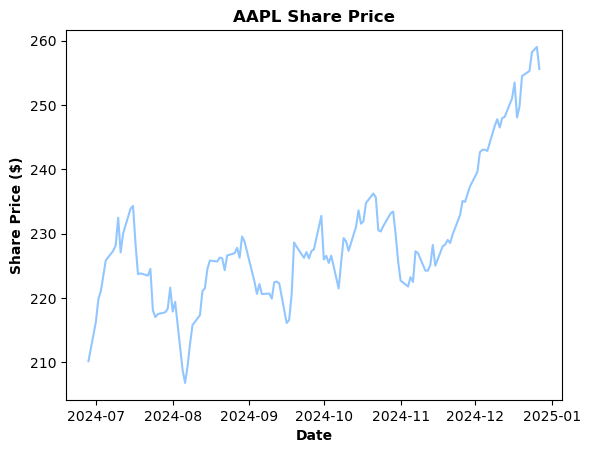

In [8]:
# Plot the Closing prices

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " Share Price", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"])

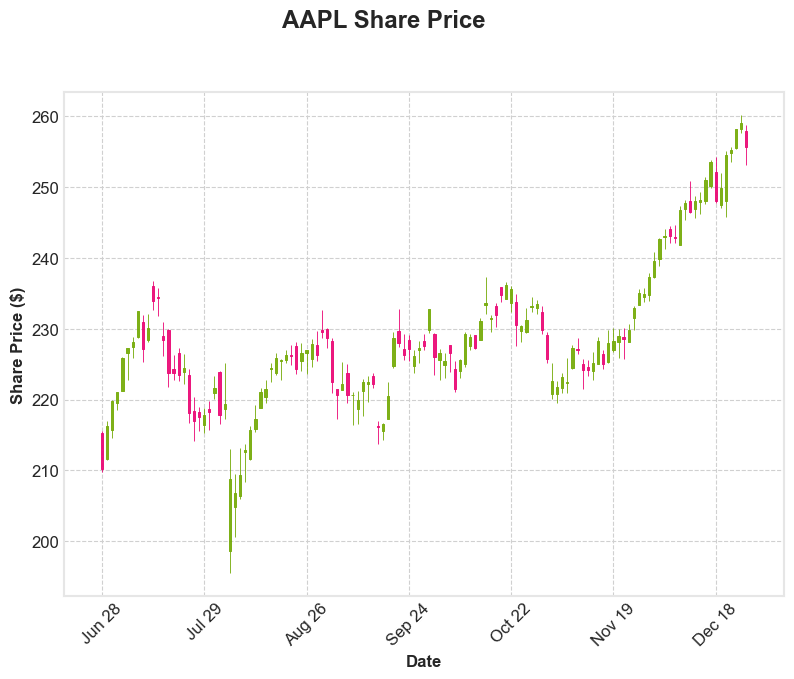

In [10]:
# Plot open, close, high and low price data on a candlestick chart, using mplfinance.
# https://github.com/matplotlib/mplfinance#tutorials
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# Initially experienced an error due to multi-column names. Set this parameter to False during the download:
# https://stackoverflow.com/questions/79133206/mplfinance-error-data-for-column-open-must-be-all-float-or-int

mpf.plot(market_data, type='candle', style='binance', figscale=1.25, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

## Trading Strategies ##

In [11]:
# Increase time window for analysis.

period = '5y'
market_data = yf.download(ticker, period=period, multi_level_index=False)
market_data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2019-12-30,70.655899,70.939476,69.128967,70.156616,144114400
2019-12-31,71.172127,71.179398,70.171135,70.270508,100805600
2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400
2020-01-03,72.088287,72.851753,71.862884,72.020424,146322800
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200
...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700


### Trend Following ###

Trend following trading strategies aim to identify the beginning / end of an upwards or downwards trend, and buy or sell the asset accordingly. Moving averages are one way of identifying trends in the market.

In [134]:
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

In [141]:
market_data['sma 50'] = calculate_sma(market_data['Close'], 50)
market_data['sma 200'] = calculate_sma(market_data['Close'], 200)

market_data

,Close,High,Low,Open,Volume,sma 50,sma 50 signal,sma 200,mac_signal,sma 300
Date,,,,,,,,,,
2019-12-30,70.655899,70.939476,69.128967,70.156616,144114400,NaN,0.0,NaN,0.0,NaN
2019-12-31,71.172127,71.179398,70.171135,70.270508,100805600,NaN,0.0,NaN,0.0,NaN
2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400,NaN,0.0,NaN,0.0,NaN
2020-01-03,72.088287,72.851753,71.862884,72.020424,146322800,NaN,0.0,NaN,0.0,NaN
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300,234.720528,1.0,210.558619,1.0,201.880197
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800,235.279930,1.0,210.984397,1.0,202.138617
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700,235.823014,1.0,211.414761,1.0,202.407235


In [ ]:
# https://en.wikipedia.org/wiki/Moving_average
# https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

# Set look back period for simple moving average
short_window = 50

# Calculate simple moving average (sma) for specified window (e.g 50 days)
market_data['sma ' + str(short_window)] = market_data['Close'].rolling(window=short_window).mean()

# Create column for sma signals and initiate with values of 0.0
market_data['sma ' + str(short_window) + ' signal' ] = 0.0

# Generate trend signals based on sma
# 1.0 signals an upward trend, i.e. the price is above the moving average.
# -1.0 signals a downward trend, i.e the price is below the moving average.
# 0.0 indicates the price is neither above nor below the moving average

market_data['sma ' + str(short_window) + ' signal' ] = np.where(
    market_data['Close'] > market_data['sma '+ str(short_window)], 1.0,
    (np.where(market_data['Close'] < market_data['sma '+ str(short_window)], -1.0, 0.0))
)

market_data

,Close,High,Low,Open,Volume,sma 50,sma 50 signal
Date,,,,,,,
2019-12-30,70.655899,70.939476,69.128967,70.156616,144114400,NaN,0.0
2019-12-31,71.172127,71.179398,70.171135,70.270508,100805600,NaN,0.0
2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400,NaN,0.0
2020-01-03,72.088287,72.851753,71.862884,72.020424,146322800,NaN,0.0
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200,NaN,0.0
...,...,...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300,234.720528,1.0
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800,235.279930,1.0
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700,235.823014,1.0


Visuialise the trends identified by the moving average.

Text(2023-04-01 00:00:00, 225, 'Upward Trend')

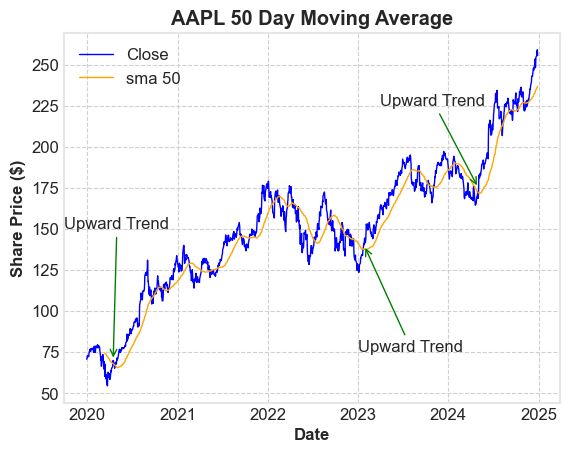

In [ ]:
# Plot the Closing prices and the Moving Average

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " " + str(short_window) + " Day Moving Average", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))

plt.legend(loc=2)

# Annotations 
### Note: Annotations below are specific for AAPL ticker ###
# They will need to be adjusted for other tickers
# https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/plotting-time-series?ex=9

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2020-04-15"),70),
            xytext=(pd.Timestamp("2019-10-01"),150),
            arrowprops={"arrowstyle":"->", "color":"green"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2023-01-25"),140),
            xytext=(pd.Timestamp("2023-01-01"),75),
            arrowprops={"arrowstyle":"->", "color":"green"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2024-05-01"),175),
            xytext=(pd.Timestamp("2023-04-01"),225),
            arrowprops={"arrowstyle":"->", "color":"green"})

### Moving Average Crossover ###

In [57]:
# https://paperswithbacktest.com/wiki/yfinance
# https://www.slingacademy.com/article/creating-simple-trading-strategies-with-yfinance-data/
# https://www.datacamp.com/tutorial/finance-python-trading

# Set longer look back period
long_window = 200

# Calculate simple moving average (sma) for specified window (e.g 200 day)
market_data['sma ' + str(long_window)] = market_data['Close'].rolling(window=long_window).mean()

# Create column for moving average crossover signals and initiate with values of 0.0
market_data['mac_signal'] = 0.0

# Generate trend signals based on moving average crossover (mac)
# 1.0 signals an upward trend, i.e. the short term sma is above the long term sma.
# -1.0 signals a downward trend, i.e the short term sma is below the long term sma.
# 0.0 indicates the short term sma  is neither above nor below the long term sma.

market_data['mac_signal'] = np.where(
    market_data['sma ' + str(short_window)] > market_data['sma '+ str(long_window)], 1.0,
    (np.where(market_data['sma ' + str(short_window)] < market_data['sma '+ str(long_window)], -1.0, 0.0))
)

market_data


,Close,High,Low,Open,Volume,sma 50,sma 50 signal,sma 200,mac_signal
Date,,,,,,,,,
2019-12-30,70.655899,70.939476,69.128967,70.156616,144114400,NaN,0.0,NaN,0.0
2019-12-31,71.172127,71.179398,70.171135,70.270508,100805600,NaN,0.0,NaN,0.0
2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400,NaN,0.0,NaN,0.0
2020-01-03,72.088287,72.851753,71.862884,72.020424,146322800,NaN,0.0,NaN,0.0
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300,234.720528,1.0,210.558619,1.0
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800,235.279930,1.0,210.984397,1.0
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700,235.823014,1.0,211.414761,1.0


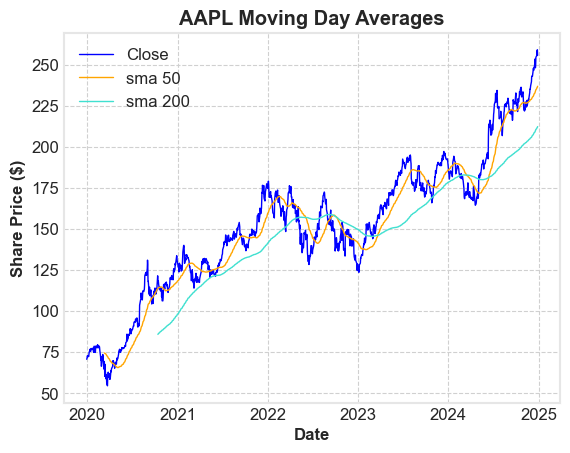

In [65]:
# Plot the Closing prices and the Moving Average

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " Moving Day Averages", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))
#ax.plot(market_data['Volume'])

plt.legend(loc=2)

Include volumetric data

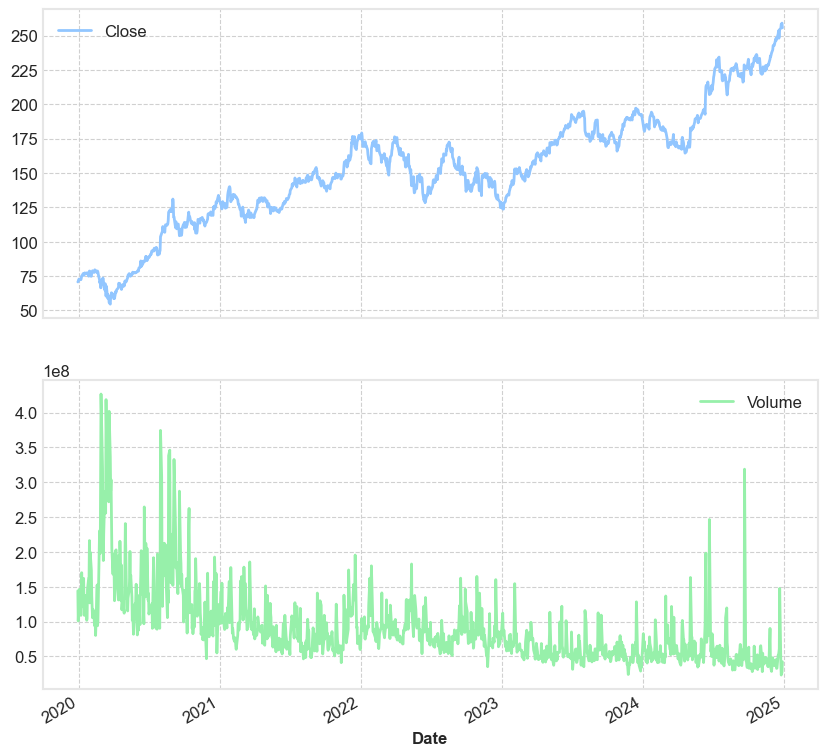

In [63]:
# Add a subplot of historical volumes
plots = market_data[['Close', 'Volume']].plot(subplots=True, figsize=(10, 10))
plt.show()

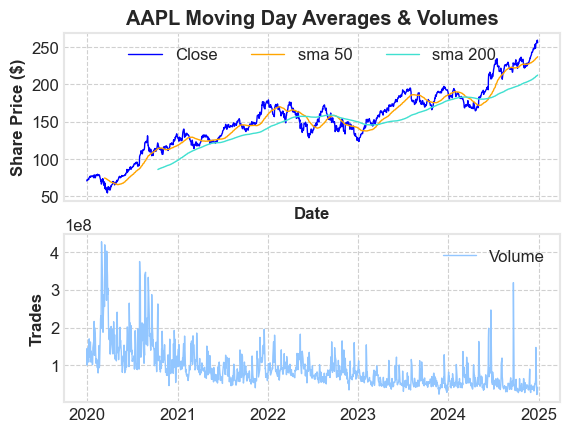

In [133]:
# Plot the Closing prices and the Moving Average
# https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/


plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

# Title.
ax1.set_title(ticker + " Moving Day Averages & Volumes", weight='bold')

# Axis labels.
ax1.set_xlabel('Date', weight='bold')
ax1.set_ylabel('Share Price ($)', weight ='bold')
ax2.set_ylabel('Trades', weight ='bold')

# ax2 = market_data.plot(x_compat=True)

# Generate plot
ax1.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax1.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax1.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))
ax2.plot(market_data['Volume'], linewidth = 1, label = 'Volume')
# ax2.bar(market_data.index, market_data['Volume'], label = 'Volume')

# https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# fig.legend(loc='upper center', ncol=4)
ax1.legend(loc='upper center', ncol=3)
ax2.legend(loc=1)

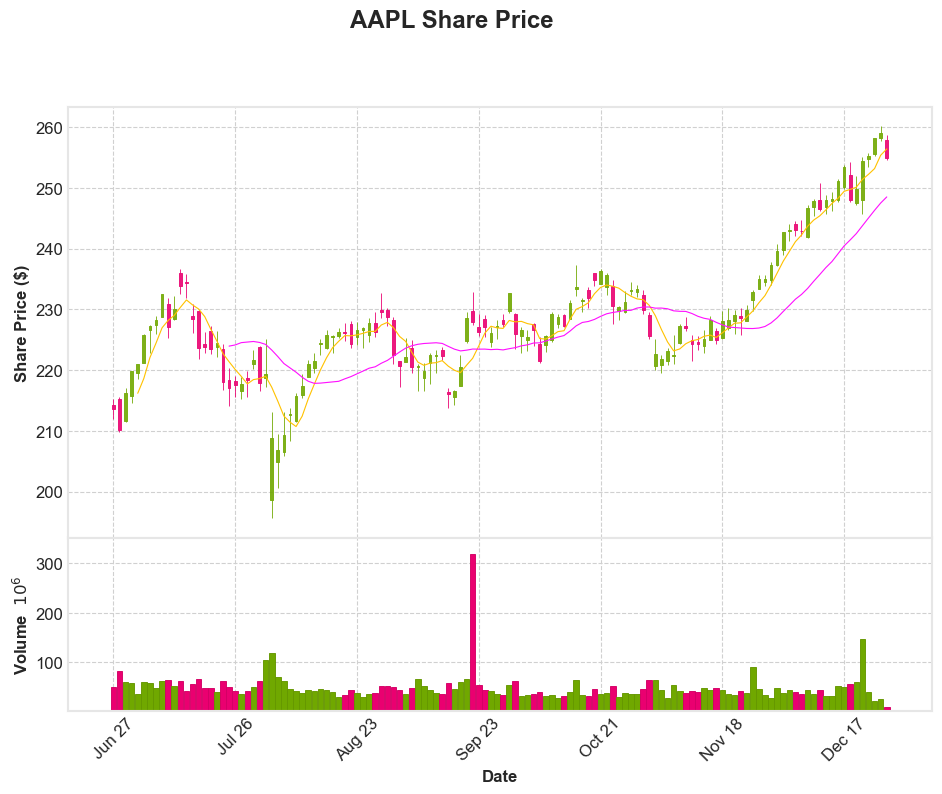

In [96]:
# Add simple moving averages and volume to candlestick chart
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# https://stackoverflow.com/questions/71179218/what-kind-of-moving-average-will-be-drawn-when-we-use-mpl-finance-mav-function

mpf.plot(market_data, type='candle', style='binance', mav=(5,20), volume=True, figscale=1.5, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

### RSI ###

### Mean Reversion ###

In [12]:
# https://www.slingacademy.com/article/backtesting-a-mean-reversion-strategy-with-yfinance/

## Backtesting ##

## End